# Life Expectancy Case Study

## Context
    
Many studies have been undertaken in the past on factors affecting life expectancy, considering demographic variables, income composition, and mortality rates. It was found that the effect of immunization and human development index was not taken into account in the past studies, and important immunizations like Hepatitis B, Polio, and Diphtheria should also be taken into account. In this case study, we will consider immunization factors, mortality factors, economic factors, social factors, and other health-related factors and use linear regression to see the effect of those factors on Life Expectancy.


## Objective
To analyze the data and build a linear regression model that can predict the life expectancy of the people of a country.


## Key Questions

- Does life expectancy have a positive or negative correlation with the different factors (immunization, mortality, socio-economic, etc.) taken into consideration for the countries?
- Can we build a linear model to predict life expectancy? If yes, how accurate will the model be?


## Data Description

The dataset contains immunization factors, mortality factors, economic factors, social factors, and other health-related factors for different countries across different years.

**Data Dictionary**

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in years
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: number of reported cases of Measles per 1000 population
- BMI: Average Body Mass Index of the entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of schooling

## Let's start coding!

### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# loading the dataset
data = pd.read_csv(
    '/content/Life Expectancy Data.csv'
)  # Make changes to the path depending on where your data file is stored.

### Data Overview

#### Think about it:

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column has different scales of data?

    - *Life expectancy*: from 59.2 to 65.0
    - *Alcohol*: constant at 0.01
    - *Measles*: from 430 to 3013

- What do you think about the effect of the different scales? If some features are 100 times the other features, will the numerical values of the features have any effect on the model?

- The *Status* column has a value "*Developing*". How to convert this text to numerical value?

In [ ]:
# check number of rows and columns

In [ ]:
# take a look at the column names


In [ ]:
# checking column datatypes and number of non-null values


#### Think about it:

- What do you interpret from the different Dtype (data-type) shown here:

     - float64
     - int64
     - object

- How will we deal with the object data-type?

- We know that our dataset has 2938 rows of data.

- By looking at the above output of *data.info()*, we see that some columns have less number of non-null values.
    - What does this mean?
        - It means some values are NULL (missing)

- How to deal with NULL (missing) values here?

<ipython-input-6-79d9e449c6dc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Infant deaths'] , shade = True)


<Axes: xlabel='Infant deaths', ylabel='Density'>

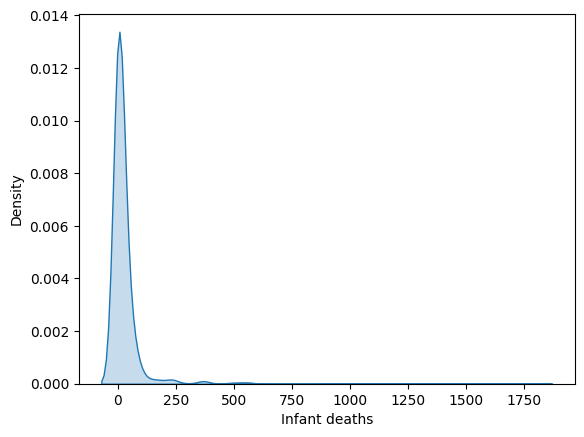

In [6]:
# Let's look at the statistical summary of the data
np.round(data.describe().T , 1)
sns.kdeplot(data['Infant deaths'] , shade = True)
#Right Skewed


- **How to deal with NULL (missing) values in the data?**
- **We will remove the rows in the data which have missing values.**

In [ ]:


# let's check the shape of the data


### We will discuss better ways of dealing with missing values in the next session.

In [7]:
# check the number of unique values in each column of the dataframe
data.nunique()

,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
Infant deaths,209
Alcohol,1076
Percentage expenditure,2328
Hepatitis B,87
Measles,958


**Observations**

- The *Status* column has 2 unique values - "*Developing*" and "*Developed*"
- The *Country* column has 133 unique values, i.e., the data is collected from 133 countries.

**We know that the datatype of two columns (*Status* and *Country*) is object. So, we need to convert them to categorical type for further processing in the next steps.**

**Before we further process the data, let's take a look at the graphical visualization of the data to understand it in a better way.**

## EDA

### Univariate analysis

In [3]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )   # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.grid(True)

**Let's explore the dependent variable *Life expectancy***

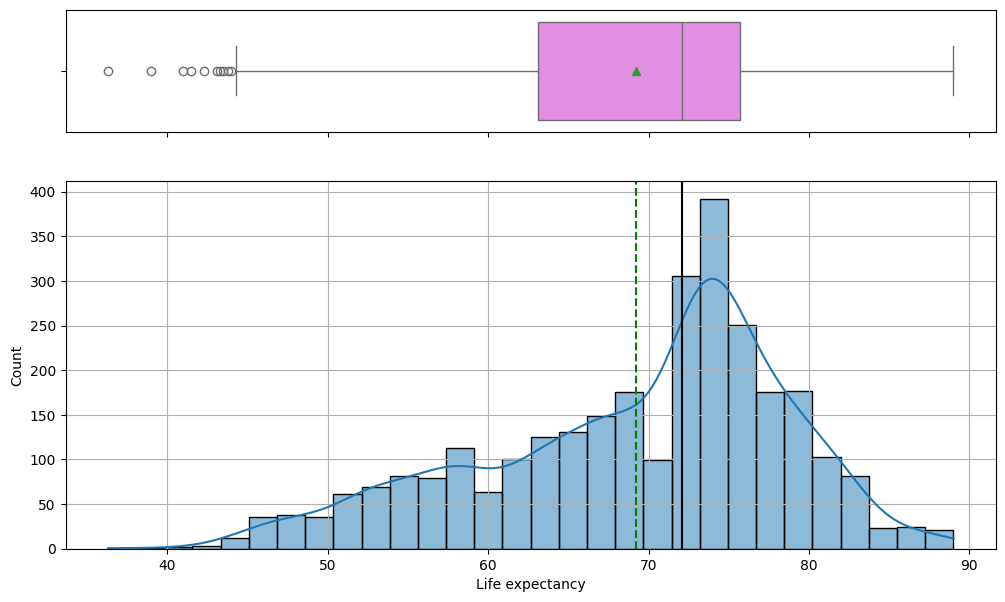

In [8]:
histogram_boxplot(data , 'Life expectancy')

**Observations**

- *Life expectancy* is left skewed, which means some countries have life expectancy less than 45 years.
- Mean life expectancy is around 70 years.

**Let's explore per capita alcohol consumption**

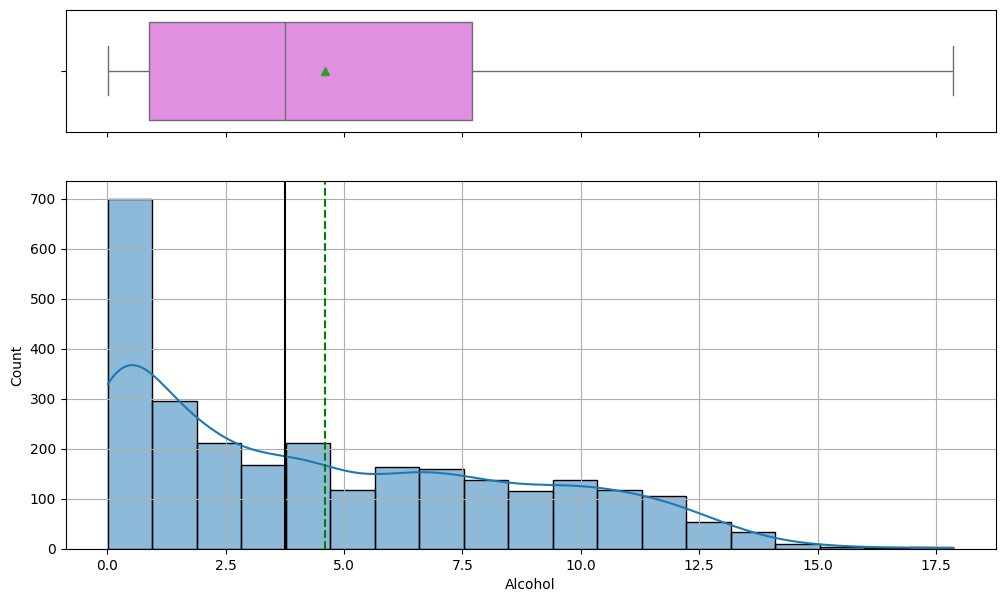

In [9]:
histogram_boxplot(data , 'Alcohol')

**Observations**

* The median alcohol consumption is 3.75 litres.
* There are some outliers where average alcohol consumption is more than 15 litres.
* The distribution is right-skewed.

**Let's explore GDP**

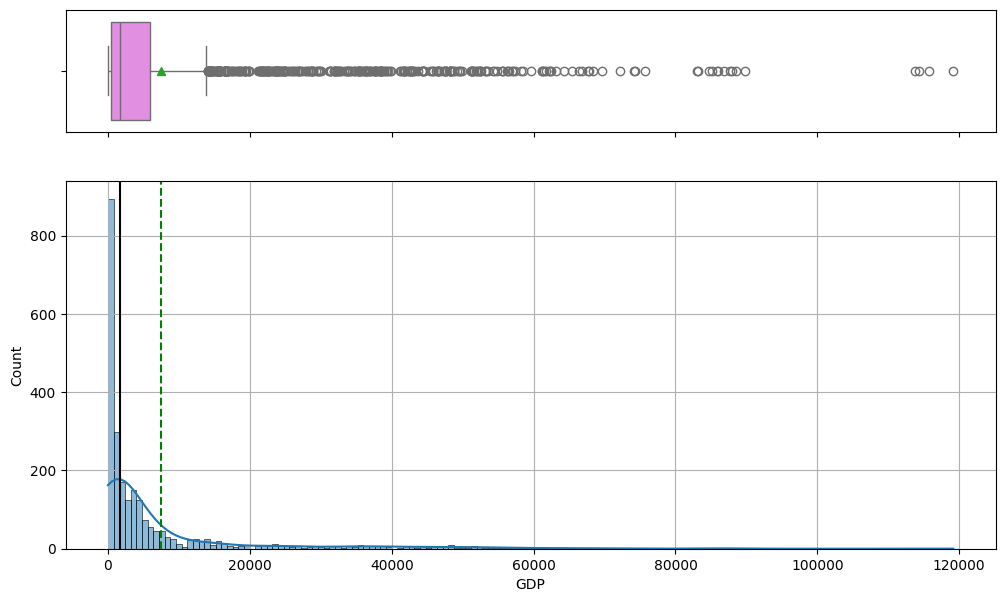

In [10]:
histogram_boxplot(data , 'GDP')

**Observations**

* The distribution of GDP is heavily skewed to the right.
* The outliers to the right indicate that many countries have a very high GDP.

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() #unique features in the column
    if n is None: #we do not want to display the top n category levels
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    #palette="Paired": This sets the color palette for the plot.
    #"Paired" is a predefined color palette in
    #Seaborn that provides a set of colors suitable for categorical data



    for p in ax.patches:

    #This loop iterates over all the bars (patches) in the count plot. Each bar is an instance of a Rectangle (patch) object.
        if perc == True:

          #if we want to display the percentage then use this piece of code
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category

        else:
          #If we want to display just the number then use this piece of code
            label = p.get_height()
            # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-14-edc43644a729>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


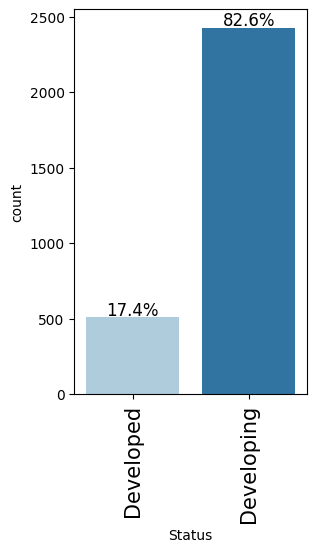

In [15]:
labeled_barplot(data , 'Status')

- More than 85% of the countries in the data are developing countries.

### Bivariate Analysis

**Let's look at correlations.**

In [23]:
data[numeric_columns].corr()['Life expectancy']

,Life expectancy
Life expectancy,1.000000
Adult Mortality,-0.696359
Infant deaths,-0.196557
Alcohol,0.404877
Percentage expenditure,0.381864
Hepatitis B,0.256762
Measles,-0.157586
BMI,0.567694
Under-five deaths,-0.222529
Polio,0.465556


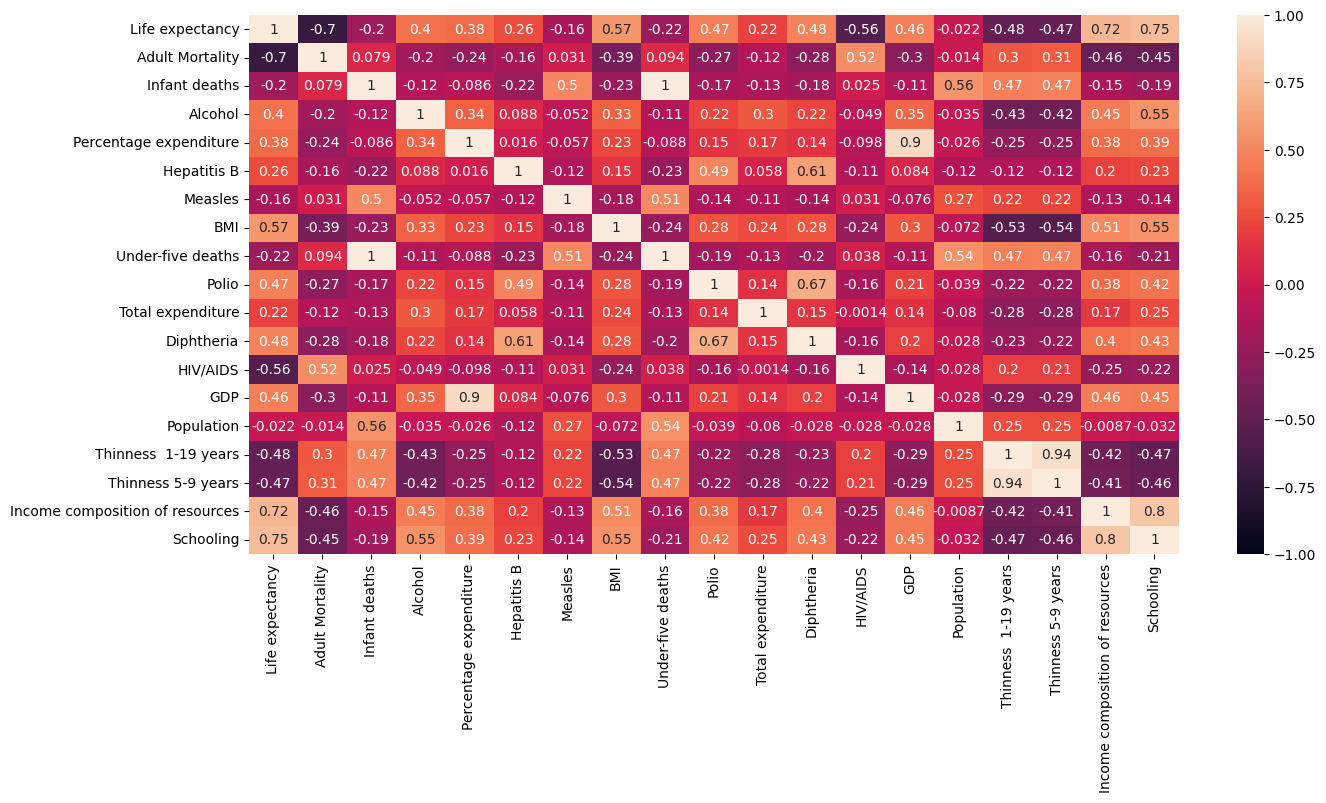

In [28]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    #fmt=".2f",
    #cmap="Spectral",
)
plt.show()

In [30]:
data[numeric_columns].corr()['Life expectancy']

,Life expectancy
Life expectancy,1.000000
Adult Mortality,-0.696359
Infant deaths,-0.196557
Alcohol,0.404877
Percentage expenditure,0.381864
Hepatitis B,0.256762
Measles,-0.157586
BMI,0.567694
Under-five deaths,-0.222529
Polio,0.465556


**Observations**

* *Life expectancy* is highly negatively correlated with *Adult Mortality* and *HIV/AIDs*, which means that as adult mortality and HIV death (0-4 years) increases, life expectancy tends to decrease.

* *Life expectancy* is highly positively correlated with *Schooling* and *Income composition of resources*, which means that as schooling years of citizens in a country and income composition of resources increases, life expectancy tends to increase.

**Let's look at the graphs of a few variables that are highly correlated with *Life expectancy*.**

***Life expectancy* vs *HIV/AIDS* vs *Status***

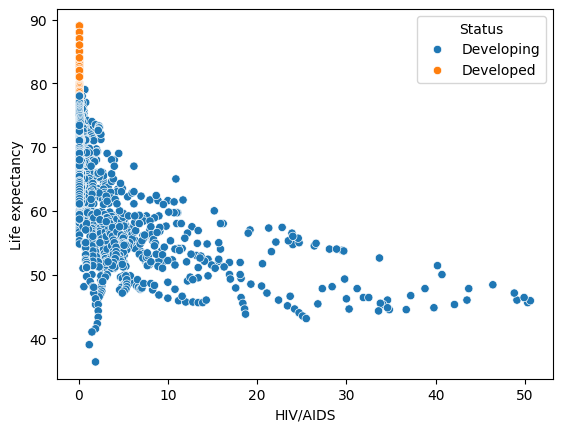

In [33]:
#HIV  -> numeric , Status => Categorical column , Life expectancy -> Numeric column
sns.scatterplot(x = 'HIV/AIDS' , y = 'Life expectancy' , hue = 'Status' , data = data)
plt.show()

* Developed countries have very low cases of HIV/AIDS and a higher life expectancy

In [21]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


***Life expectancy* vs *Schooling* vs *Status***

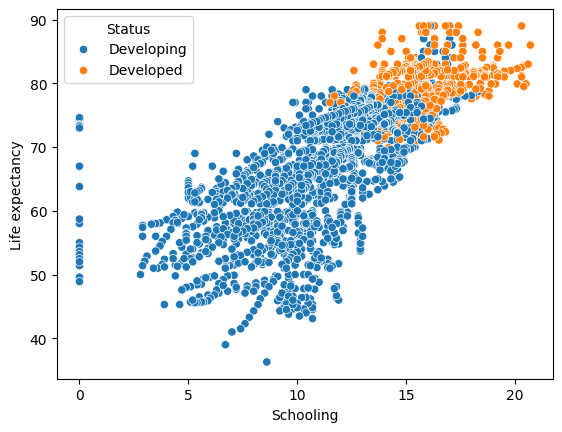

In [34]:
sns.scatterplot(x = 'Schooling' , y = 'Life expectancy' , hue = 'Status' , data = data)
plt.show()

As schooling increase , life expectancy increases both in case of developing as well in case of developed nations

In [35]:
data2 = data.select_dtypes(include = np.number)

In [39]:
data2.head()

,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Axes: xlabel='Schooling', ylabel='Life expectancy'>

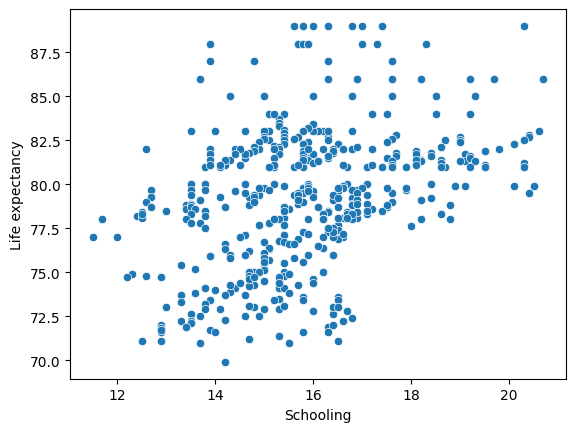

In [24]:
#For developing
y = data[data['Status'] == 'Developed']
sns.scatterplot(x = 'Schooling' , y = 'Life expectancy' , data = y)

<Axes: xlabel='Schooling', ylabel='Life expectancy'>

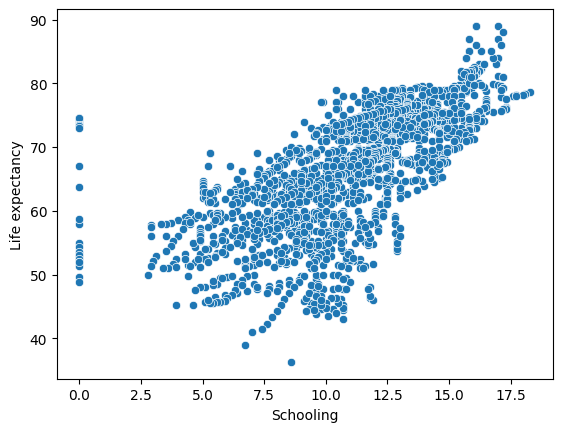

In [25]:
#For developing
x = data[data['Status'] == 'Developing']
sns.scatterplot(x = 'Schooling' , y = 'Life expectancy' , data = x)

<Axes: xlabel='Schooling', ylabel='Life expectancy'>

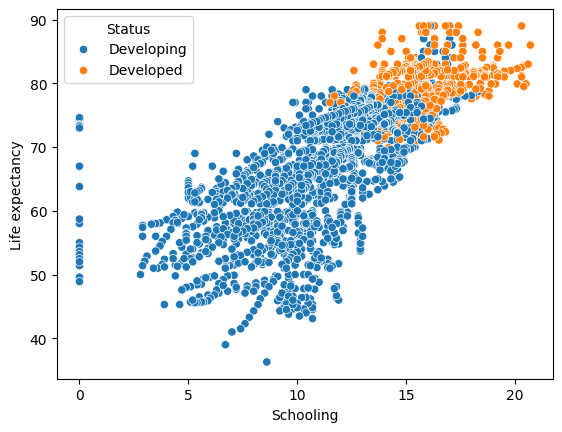

In [26]:
sns.scatterplot(x = 'Schooling' , y = 'Life expectancy' , data = data , hue = 'Status')

In [40]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [41]:
# prompt: store all the numerical columns in new dataframe data1

import numpy as np
data1 = data.select_dtypes(include=np.number)
data1.head()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [43]:
data1[data1.columns[0:]].corr()['Life expectancy'].sort_values(ascending = False).round(2)

,Life expectancy
Life expectancy,1.00
Schooling,0.75
Income composition of resources,0.72
BMI,0.57
Diphtheria,0.48
Polio,0.47
GDP,0.46
Alcohol,0.40
Percentage expenditure,0.38
Hepatitis B,0.26


In [44]:
#heteroscedasticity -> Residual Error should not increase with the increase in values of y , they should settle at local minima

#Low bias and low variance is the best case scenario where low error in train data (BIAS) and low error in test data (Variance)

#THERE SHOULD BE NO heteroscedasticity, (Errors should converge)

#There should be no auto coorealtion , (We talk of a single variable , not multiple variables) No relation between past data of a single variable

#There should be no multicolinearity -> (There should be no relation among the variables , all the features should be independent of each other)

#The test for this is VIF (If VIF > 10 , we reject the feature)



In [46]:
#some features are having very less correlation , drop them
data1.drop(columns = ['Population' , 'Year'] , axis =1 , inplace = True)

In [ ]:
# plt.figure(figsize=(10, 7))
# sns.scatterplot(y="Life expectancy", x="Schooling", hue="Status", data=data)
# plt.show()

**Observations**

* Majority of the developed countries have schooling of more than 13 years.
* Developing countries have a higher variance in schooling years.

**Let's check the variation in *Life expectancy* with *Year***

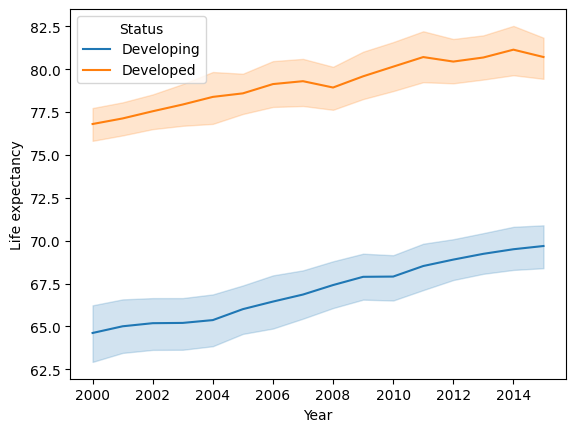

In [48]:
#data1 has no column of year , lets use data dataframe to check this relation

sns.lineplot(x = 'Year' , y = 'Life expectancy' , hue = 'Status' , data = data)
plt.show()

The graph has a clear demonstration that the developed nations are having better life expectancy compared to developing nations but one thing to note is that each and every passing year , the life expectancy is increasing both in case of developing as well as developed nations

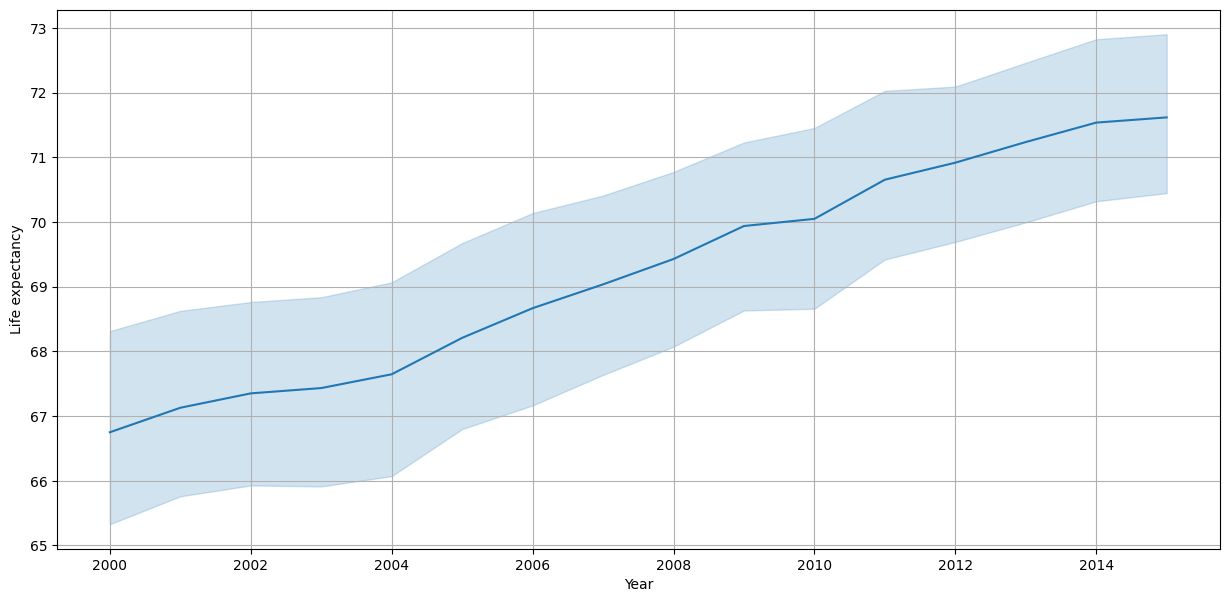

In [49]:
plt.figure(figsize = (15 , 7))
sns.lineplot(x = 'Year' , y = 'Life expectancy' , data = data)
plt.grid(True)

plt.show()

In [ ]:
# # average life expectancy over the years
# plt.figure(figsize=(15, 7))
# sns.lineplot(x="Year", y="Life expectancy", data=data, ci=None)
# plt.show()

* Overall life expectancy of the world population is increasing over the years after 2003.

## Linear Model Building

1. We want to predict the life expectancy.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [63]:
# defining X and y variables
X = data.drop(['Life expectancy'] , axis = 1)

y = data['Life expectancy']

In [64]:
#Check for null values
X.isnull().sum()

,0
Country,0
Year,0
Status,0
Adult Mortality,10
Infant deaths,0
Alcohol,194
Percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34


In [65]:
for c in X.columns:
    if X[c].isnull().sum() > 0:
        X[c].fillna(X[c].median(), inplace=True)
X.isnull().sum()

,0
Country,0
Year,0
Status,0
Adult Mortality,0
Infant deaths,0
Alcohol,0
Percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


In [66]:
# prompt: Fill null values in X with median

# Fill null values in X with median
X = X.fillna(X.mode())
y = y.fillna(y.median())

In [67]:
#get_dummies (ONE HOT ENCODING METHOD Of Dealing with categorical variables)
X = pd.get_dummies(X , drop_first = True , columns = X.select_dtypes(include = 'object').columns.tolist())
X.head()

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,False,False,False,False,False,False,False,False,False,True


In [68]:
# splitting the data in 70:30 ratio for train to test data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [69]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2056
Number of rows in test data = 882


In [70]:
X.isnull().sum().sum()



0

In [71]:
# prompt: create a linear regression with X_train and y_train

# creating the model
model = LinearRegression()
# fitting the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# we will now print the coefficients of each feature

In [77]:
coef_df = pd.DataFrame(np.append(model.coef_ , model.intercept_) , index = X_train.columns.tolist() + ['intercept'] ,
                       columns = ['Coefficients'])

In [78]:
coef_df

,Coefficients
Year,0.260507
Adult Mortality,-0.001349
Infant deaths,0.062292
Alcohol,-0.071876
Percentage expenditure,0.000155
...,...
Country_Yemen,5.390859
Country_Zambia,-0.051587
Country_Zimbabwe,-1.018323
Status_Developing,-19.629552


**Let's check the coefficients and intercept of the model.**

**Let us now make predictions on the test set (*X_test*) with the model, and compare the actual output values with the predicted values.**

In [83]:
y_pred = model.predict(X_test)
pred_dataframe = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
pred_dataframe['mean_diff'] = pred_dataframe['Actual'] - pred_dataframe['Predicted']
pred_dataframe['mean_diff'] = pred_dataframe['mean_diff']**2
N = y_pred.shape[0]


In [84]:
pred1 = model.predict(X_test)
df_pred =pd.DataFrame({'Actual':y_test , 'Predicted':pred1})
df_pred

,Actual,Predicted
2546,73.7,70.319392
650,75.9,75.746083
1740,74.2,74.224048
177,76.8,77.444268
1377,51.9,51.755351
...,...,...
1241,69.3,71.562660
1456,69.9,71.474715
123,86.0,80.374473
2509,81.7,84.634256


In [85]:
#NOW LETS check the scores of the model


# making predictions on the test data
y_pred = model.predict(X_test)

# evaluating the model
r2 = r2_score(y_test, y_pred)

adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


R-squared: 0.9518984690030171
Adjusted R-squared: 0.9366555324240031


In [86]:
# predictions on the test set
pred = model.predict(X_test)


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we will check the first 25 records only.

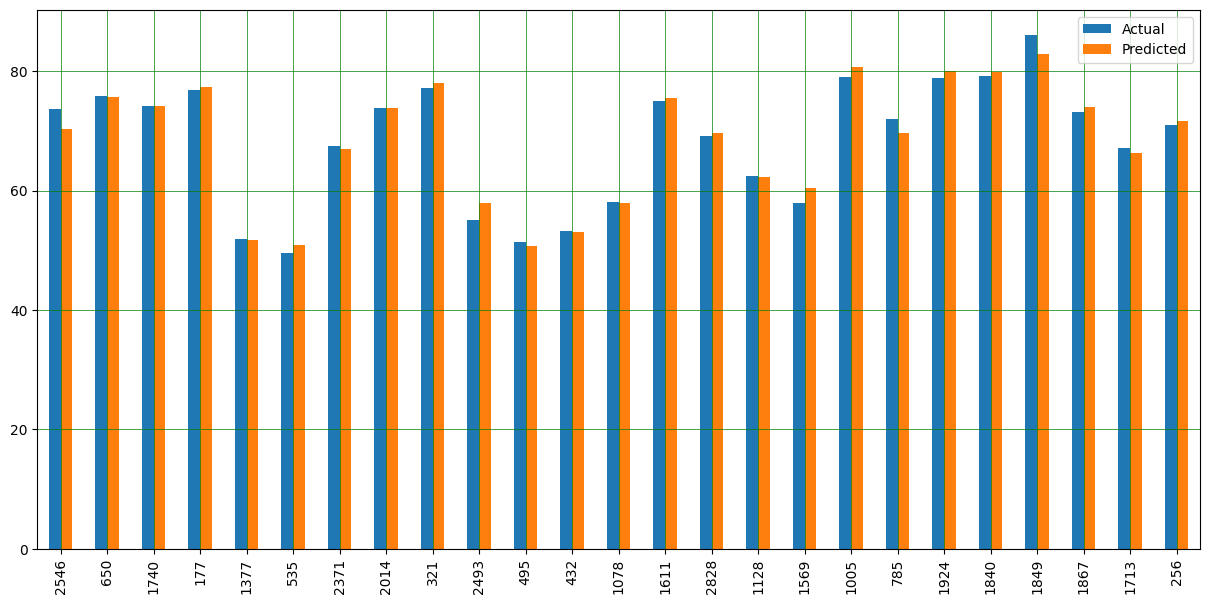

In [81]:
np.random.seed(42)
df1 = df_pred.head(25)

df1.plot(kind="bar", figsize=(15, 7))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [87]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0] #number of samples
    k = predictors.shape[1] #number of features
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
#MAPE -> Mean Absolute Percentage Error
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [88]:
# checking model performance on train set (seen 70% data)
linearreg_train_performance = model_performance_regression(model , X_train , y_train)
linearreg_train_performance

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.795714,1.149823,0.963754,0.959585,1.703487


In [89]:
# checking model performance on test set (seen 30% data)
linearreg_test_performance = model_performance_regression(model , X_test , y_test)
linearreg_test_performance

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.120716,1.259395,0.951898,0.936656,1.896193


In [90]:
X_test_num = X_test.select_dtypes(include=np.number)
X_test_num

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
2546,2006,123.0,8,0.97,122.652333,83.0,517,48.5,10,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
650,2006,113.0,0,11.83,1555.651986,92.0,1,58.1,0,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
1740,2007,125.0,0,4.98,678.518894,9.0,0,57.2,0,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
177,2014,7.0,0,1.57,367.255674,98.0,46,62.9,0,98.0,4.98,98.0,0.1,24983.379200,1386542.0,6.1,6.0,0.820,14.5
1377,2000,428.0,77,1.51,0.681686,92.0,21002,14.4,121,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2008,167.0,32,0.17,192.156300,66.0,5494,54.5,38,71.0,3.93,69.0,0.1,4521.324700,29111417.0,5.4,5.1,0.638,10.3
1456,2001,228.0,0,6.68,332.275171,96.0,1,55.7,0,97.0,6.17,97.0,0.1,3572.851300,233717.0,2.8,2.8,0.728,14.2
123,2004,69.0,1,9.84,588.568371,95.0,70,6.9,1,92.0,8.57,92.0,0.1,3472.379770,21274.0,0.7,0.6,0.908,20.7
2509,2011,58.0,0,7.40,11477.667100,42.0,26,57.7,0,98.0,11.70,98.0,0.1,59593.287110,9449213.0,1.4,1.3,0.901,16.0


**Observations**

- The training $R^2$ is 0.972, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict life expectancy within a mean error of 1.21 years on the test data.

- MAPE of 1.73 on the test data means that we are able to predict within 1.7% of the life expectancy.

## Introduction to *statsmodels*

- We have build a linear regression model which shows good performance on the train and test sets.

- But this is **not** our final model.

- We have to check the statistical validity of the model, and also make sure it satisfies the assumptions of linear regression.

- We will now perform linear regression using *statsmodels*, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using *statsmodels*, we will be able to check the statistical validity of our model.

In [92]:
import statsmodels.api as sm
X_train_num = X_train.select_dtypes(include=np.number)
X_train_num.head()

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1641,2008,64.0,0,7.14,2655.573684,86.0,1,66.6,0,72.0,8.15,72.0,0.1,21928.767000,49379.0,0.7,0.7,0.813,14.6
618,2005,394.0,8,2.03,0.000000,92.0,146,21.7,13,62.0,2.42,62.0,5.9,1766.947595,1386542.0,8.8,8.5,0.496,9.4
406,2009,283.0,44,4.55,81.143047,92.0,54118,16.1,77,91.0,7.41,92.0,1.1,552.745552,1514199.0,9.3,8.8,0.356,5.9
1094,2011,289.0,4,3.57,40.453674,86.0,0,23.7,7,85.0,5.46,86.0,5.7,692.699890,1596154.0,7.8,7.7,0.410,9.0
1788,2007,217.0,58,0.26,0.530573,85.0,1088,17.6,78,84.0,1.68,86.0,0.6,41.451000,49171586.0,13.2,13.5,0.484,8.1


In [93]:
x_train = sm.add_constant(X_train_num)
#mandatory step
lm = sm.OLS(y_train, x_train).fit()
print(lm.summary())
#This model will only take values which are numeric

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     474.1
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:06:21   Log-Likelihood:                -5792.9
No. Observations:                2056   AIC:                         1.163e+04
Df Residuals:                    2036   BIC:                         1.174e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#Null hypothesis is that all the beta values are 0 ,p value is high (p>alpha , accept the null hypothesis , that feature coefficient is 0 , we can reject the )

In [94]:
X_train_num

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1641,2008,64.0,0,7.14,2655.573684,86.0,1,66.6,0,72.0,8.15,72.0,0.1,21928.767000,49379.0,0.7,0.7,0.813,14.6
618,2005,394.0,8,2.03,0.000000,92.0,146,21.7,13,62.0,2.42,62.0,5.9,1766.947595,1386542.0,8.8,8.5,0.496,9.4
406,2009,283.0,44,4.55,81.143047,92.0,54118,16.1,77,91.0,7.41,92.0,1.1,552.745552,1514199.0,9.3,8.8,0.356,5.9
1094,2011,289.0,4,3.57,40.453674,86.0,0,23.7,7,85.0,5.46,86.0,5.7,692.699890,1596154.0,7.8,7.7,0.410,9.0
1788,2007,217.0,58,0.26,0.530573,85.0,1088,17.6,78,84.0,1.68,86.0,0.6,41.451000,49171586.0,13.2,13.5,0.484,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2011,59.0,0,6.91,3601.287457,82.0,3,68.0,0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8
1095,2010,287.0,4,3.21,53.307827,83.0,26,23.1,7,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9
1130,2007,266.0,17,6.08,56.778587,92.0,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4
1294,2003,72.0,2,9.30,3519.258515,95.0,10982,57.0,3,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4


In [110]:
# prompt: fit the lm model on X_tes

x_test = sm.add_constant(X_test_num)
lm_test = sm.OLS(y_test, x_test).fit()


In [ ]:
#AIC and BIC

In [113]:
X_test = sm.add_constant(X_test)
print(lm.summary())

#F-statistic -> H0 => All beta values (Weights) is 0
#Alt Hypo => Atleast one of the beta value is different

#p<alpha

#null hypo rejected , Atleast one beta value or weight is non zero (Goodness of Fit condition)



                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     474.1
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:04:43   Log-Likelihood:                -5792.9
No. Observations:                2056   AIC:                         1.163e+04
Df Residuals:                    2036   BIC:                         1.174e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

High p-Value: Not significant, indicating weak evidence against the null hypothesis. You do not reject the null hypothesis.

Low p-Value: Significant, indicating strong evidence against the null hypothesis. You reject the null hypothesis.(So you take this feature)

Null Hypothesis is that Beta is 0


In [114]:
#[0.025      0.975] => Confidence interval of Beta values

In [115]:
#Drop the columns with high p values (p high , NUll true => Means that Beta is 0 , Hence drop the column it wont be having any impact on the target column)

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.968**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the dependent variable (features like *Country*, *Status*, *Adult_Mortality* and so on) coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-348.6235**


3. **Coefficient of an independent variable**: It represents the change in the output Y due to a change in the independent variable (everything else held constant).


5. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


6. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


7. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Conclusion

- We have seen how to build a linear regression model to predict the life expectancy of the population using various factors, and how to check the model's performance.

- We used *statsmodels OLS* to check the significance of each of the independent variables in predicting the life expectancy.

- But the check for statistical validity of the model is not complete as the p-values will be affected if linear regression assumptions are not satisfied.

- So, we need to first ensure that our model satisfies the assumptions of linear regression. Then, we can draw inferences from our model.

### We will be discussing the assumptions of linear regression in the next session.

In [92]:
#LINEAR REGRESSION CAN ALSO BE BUILT USING stats model (INTENSE MATHEMATICAL MODEL)